# Importing the libraries

In [253]:
from numpy.core.fromnumeric import mean
import pandas as pd #dataframe
import numpy as np#dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing the data
The data was taken from https://transparencia.unicamp.br/paginas/consultar-salarios-do-mes-atual/  
A site made by UNICAMP university with the idea of giving better transparency to the public founds expendures.

In [254]:
data_original = pd.read_csv('consultar-salarios.csv',sep=';')
data = data_original.drop_duplicates()

# Data cleaning and manipulating
## Checking missing values
There is a really cool library called missingno which allow us to visualize the missing cell in a dataframe.  
We can see how the data is completly filled with no empty cells, columns or lines. Great!

<AxesSubplot:>

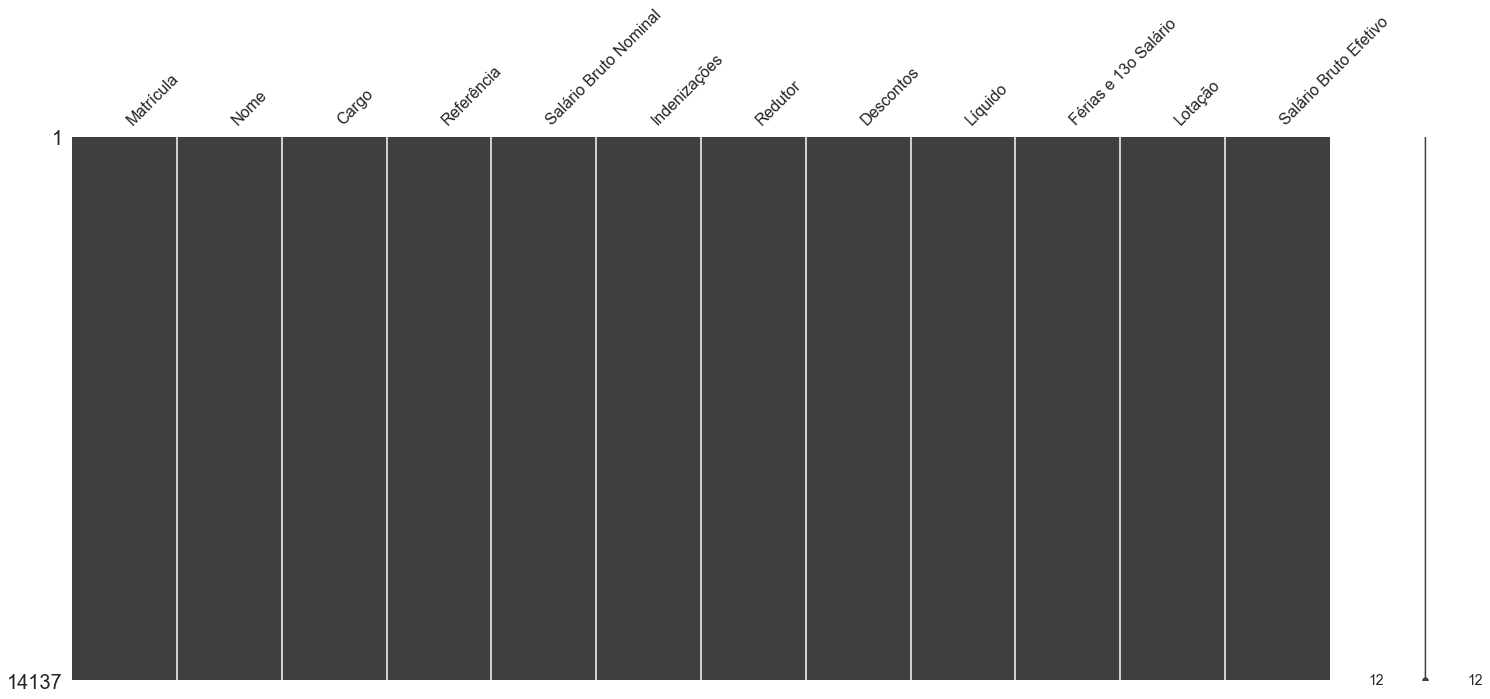

In [255]:
msno.matrix(data)

## Money columns cleaning
Here we clean some columns changing the money columns from "R$ 1000,00" to a numerical "1000.00".

In [256]:
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace('.','')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace(',','.')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str[3:]

data['Indenizações'] = data['Indenizações'].str.replace('.','')
data['Indenizações'] = data['Indenizações'].str.replace(',','.')
data['Indenizações'] = data['Indenizações'].str[3:]

data['Redutor'] = data['Redutor'].str.replace('.','')
data['Redutor'] = data['Redutor'].str.replace(',','.')
data['Redutor'] = data['Redutor'].str[3:]

data['Descontos'] = data['Descontos'].str.replace('.','')
data['Descontos'] = data['Descontos'].str.replace(',','.')
data['Descontos'] = data['Descontos'].str[3:]

data['Líquido'] = data['Líquido'].str.replace('.','')
data['Líquido'] = data['Líquido'].str.replace(',','.')
data['Líquido'] = data['Líquido'].str[3:]

data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace('.','')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace(',','.')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str[3:]

data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace('.','')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace(',','.')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str[3:]

In [257]:
data["Salário Bruto Nominal"] = pd.to_numeric(data["Salário Bruto Nominal"])
data["Indenizações"] = pd.to_numeric(data["Indenizações"])
data["Redutor"] = pd.to_numeric(data["Redutor"])
data["Descontos"] = pd.to_numeric(data["Descontos"])
data["Líquido"] = pd.to_numeric(data["Líquido"])
data["Férias e 13o Salário"] = pd.to_numeric(data["Férias e 13o Salário"])
data["Salário Bruto Efetivo"] = pd.to_numeric(data["Salário Bruto Efetivo"])

## Ocupation column
Here we split the occupation ('Cargo') into general and specific names ('Cargo1' and 'Cargo2', respectively).

In [258]:
data[['Cargo1','Cargo2']] = data['Cargo'].str.split(pat=' / ',expand=True)
for i in range(0,data['Cargo'].size):
    if (data['Cargo2'].loc[i] is None): 
        data['Cargo2'].loc[i]=data['Cargo1'].loc[i]
        data['Cargo1'].loc[i]=None

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Spliting the department categories
Here we split the destiny of each salary into categories and sub-categories. So we can see were and how much is being spend in each department/college.
We can see how many of the sub-categories are empty because the final destination of the resource was a higher level in the category tree.

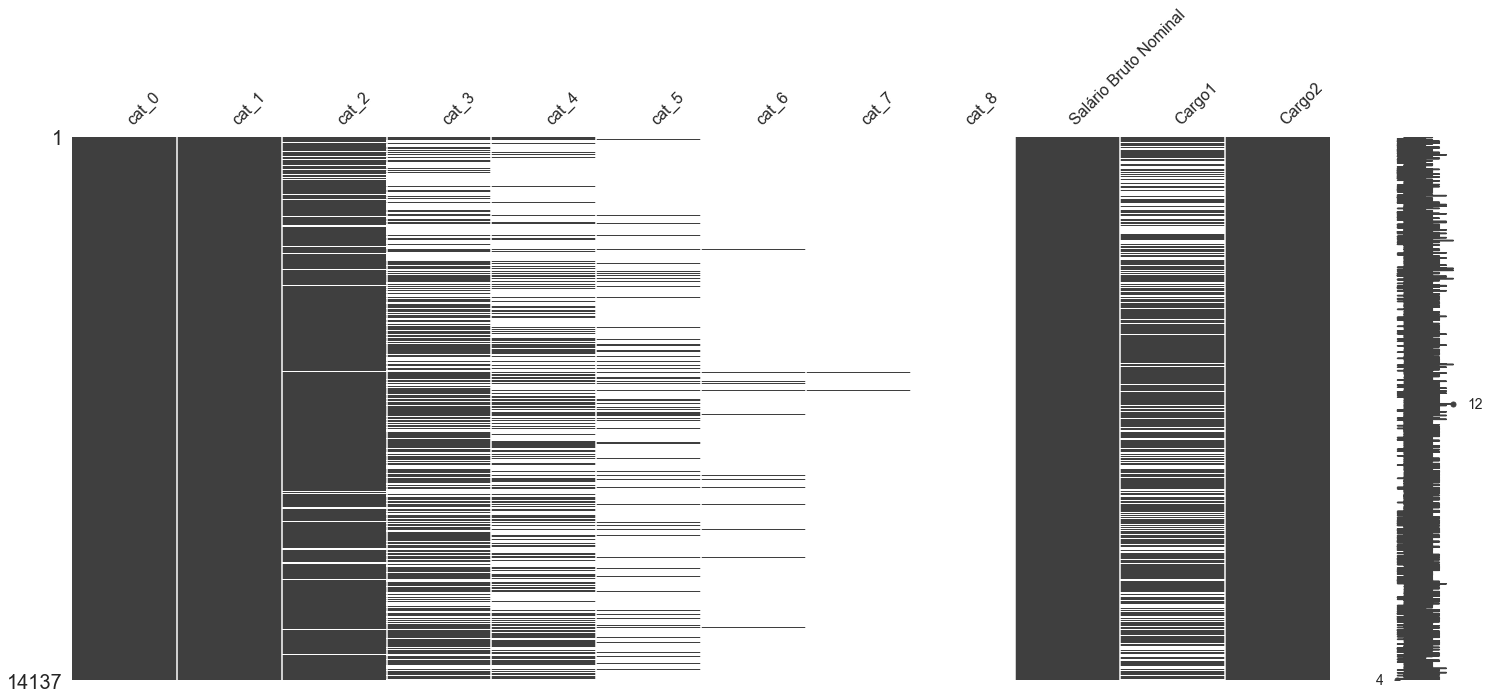

In [259]:
#split the column in each category and sub-category
df = data['Lotação'].str.split(pat='/', expand=True) 
df.columns = ['cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7','cat_8'] #change every expenditure category column name
df.insert(loc=0, column='cat_0',value=None)
df[['cat_0','cat_1']] = df['cat_1'].str.split(pat=' ', expand=True,n=1)

df['Salário Bruto Nominal'] = pd.to_numeric(data['Salário Bruto Nominal']) #convert to numeric
df['Cargo1'] = data['Cargo1']
df['Cargo2'] = data['Cargo2']

msno.matrix(df)
df.fillna('EMPTY', inplace=True)

# Plotting the data
## Salaries distributions
Here we se the distribution and a box plot of all the raw monthly salaries ('Salario Bruto Nominal') along with the median and average.  
We can see a peak around R\$10,000 but with a long tail going up to R\$70,000. In Brazil the minimun wage is R\$ 1,100 per month since 01/2021.

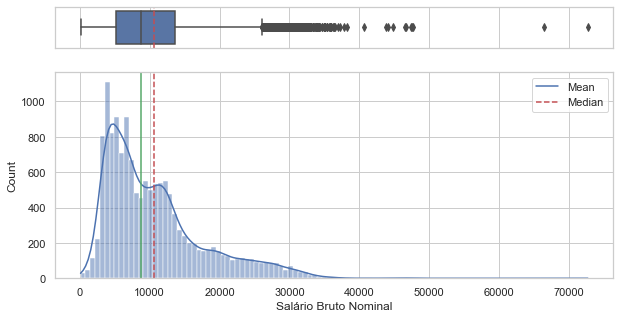

<Figure size 432x288 with 0 Axes>

In [260]:
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=data['Salário Bruto Nominal'].mean()
median=data['Salário Bruto Nominal'].median()

sns.boxplot(x=data['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=data['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/salaries.jpeg")

## Plotting the 10 biggest expenses in salaries
Here we plot the total sum of salaries by category (that we separated in the data cleaning part).
The graph is side-by-side with the median and count dor each horizontal bar.
We can see how the 'Reitoria'(Rectory) have the biggest expenses but also one of the biggest count of salaries.  
The 'Hospital de clinicas'(Clinical hospital) and the 'Faculdade de ciências médicas'(Medical school) follow a similar paths. That might mean that they have a lot of employees but with not a big wage, with could be a problem of too many or unecessary employess or simply the department characterist, since a hospital needs a lot of people and the administratives task of the Rectory might also need a lot of people.  

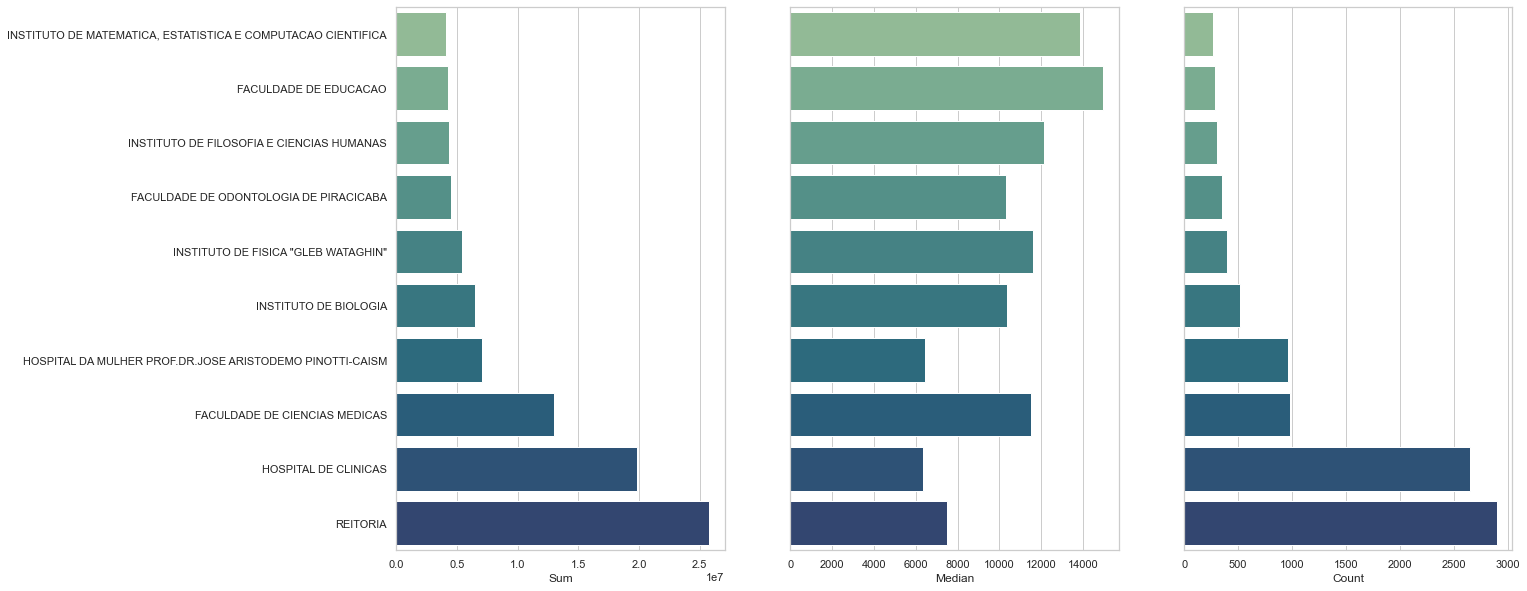

In [261]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').sum().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').median().reset_index()
df3 = df.groupby('cat_1').count().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Sum')
fig2.set(xlabel='Median')
fig3.set(xlabel='Count')


plt.savefig("Figures/salaries_institute.jpeg")

## Analysing deeper
We'll plot the distribution of each department mentioned before and see how each one is behaving.
### 'Reitoria'(Rectory)
Here we plot the distribution of the 'Reitoria'(Rectory) and we can see how it follows a similar shape as the whole university wage distribution.

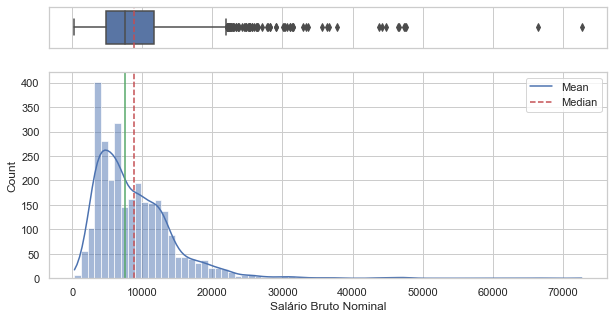

<Figure size 432x288 with 0 Axes>

In [262]:
df_median = df.loc[(df['cat_1']=='REITORIA')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/reitoria_salaries_distribution.jpeg")

### 'Faculdade de ciencias medicas'(Medical school)
Here we plot the Medical school distribution seeing a similar shape as the university distribution

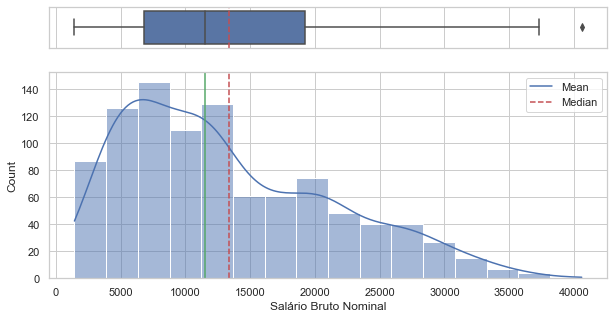

<Figure size 432x288 with 0 Axes>

In [263]:
df_median = df.loc[(df['cat_1']=='FACULDADE DE CIENCIAS MEDICAS')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/fcm_salaries_distribution.jpeg")

### 'Hospital de clinicas'(Clinical hospital)
We repeat the same distribution seeing similar results.

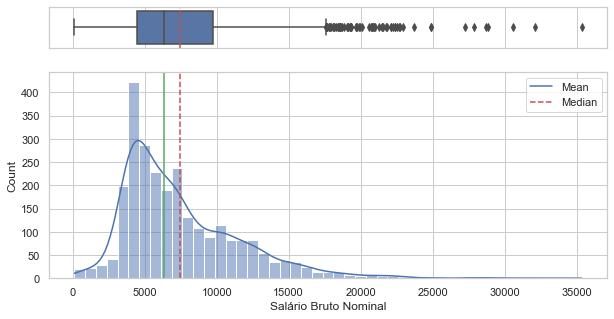

<Figure size 432x288 with 0 Axes>

In [264]:
df_median = df.loc[(df['cat_1']=='HOSPITAL DE CLINICAS')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/hc_salaries_distribution.jpeg")

# Plotting the 10 biggest median salaries
Here we'll see what are the biggest median salaries. Median is a better representation of the salary since the distribution have a long tail and the mean wouldn't represent properly the "average worker".  
We start by plotting the 10 biggest median salaries along with the total sum and count by department. We can see how all ten of then have similar salaries with small differences in the median salary. Also, all of them are colleges. Like, Architecture College, Education College, Engineer Schools and so on.   
That might relate to the fact that professors are associated with a College and they usually have the biggest wages, since they all have at least a Masters degree but usually a Masters and a Doctors degree, giving classes, doing research and sometimes have administratives tasks like college director or graduation coordinator.  
The sum of salaries follows the total count of salaries, so we can conclude that all of them have similar patterns of bigger salaries.

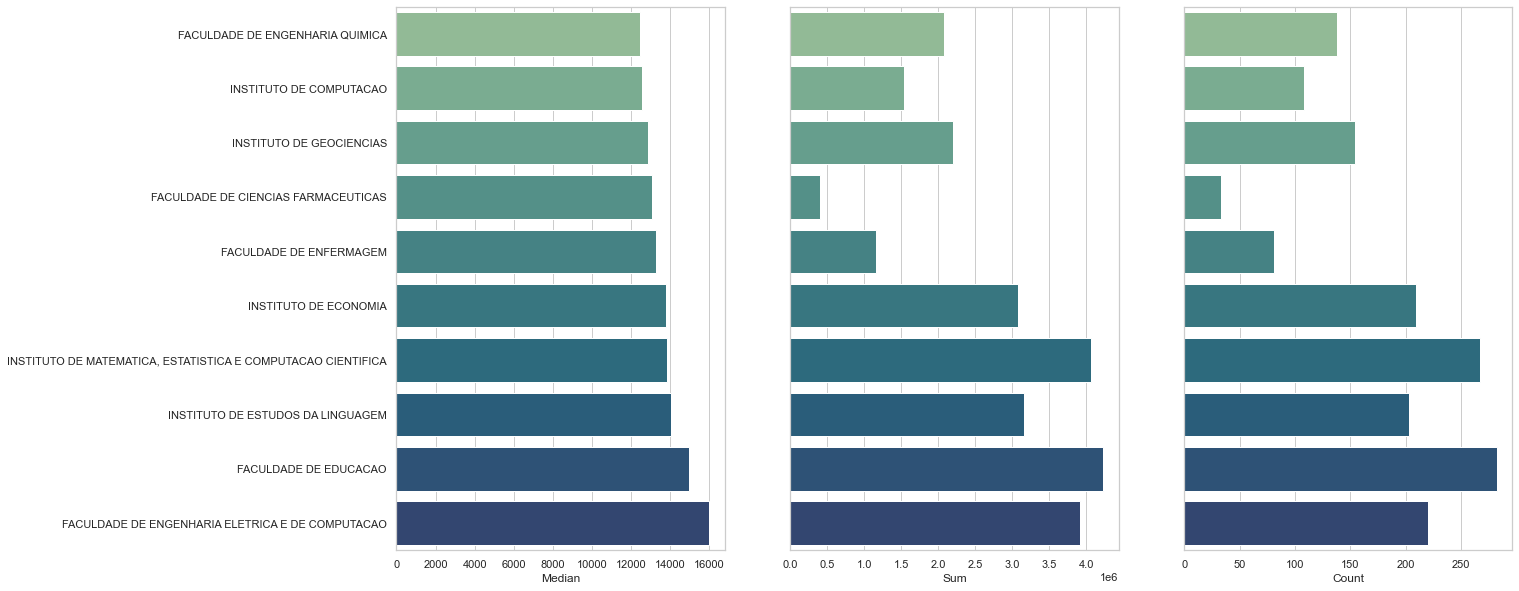

In [265]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').median().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').sum().reset_index()
df3 = df.groupby('cat_1').count().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Median')
fig2.set(xlabel='Sum')
fig3.set(xlabel='Count')

plt.savefig("Figures/salaries_category_biggest.jpeg")

## 'Faculdade de engenharia eletrica e de computação'(Electrical and computation engineer school)
Here we explore more the biggest median salary of all of them. The 'Faculdade de engenharia eletrica e de computacao' (Electrical and computation engineer school).  
### Analysing deeper
We can se the result we predicted before, bigger salaries with a higher median and mean than the university.

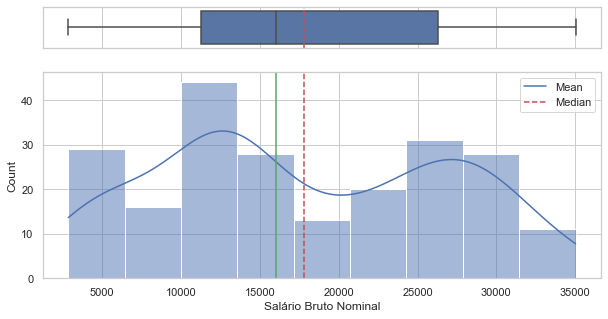

<Figure size 432x288 with 0 Axes>

In [266]:
df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/feec_salaries_distribution.jpeg")

### Exploring by sub-deparment
Here we try to see how the salaries are distributed by sub-department and sub-sub-department.  
In the sub-department the highest expenses are with the 'Departamentos'(department). Which are were the professors are associated with. Which explains the higher values.

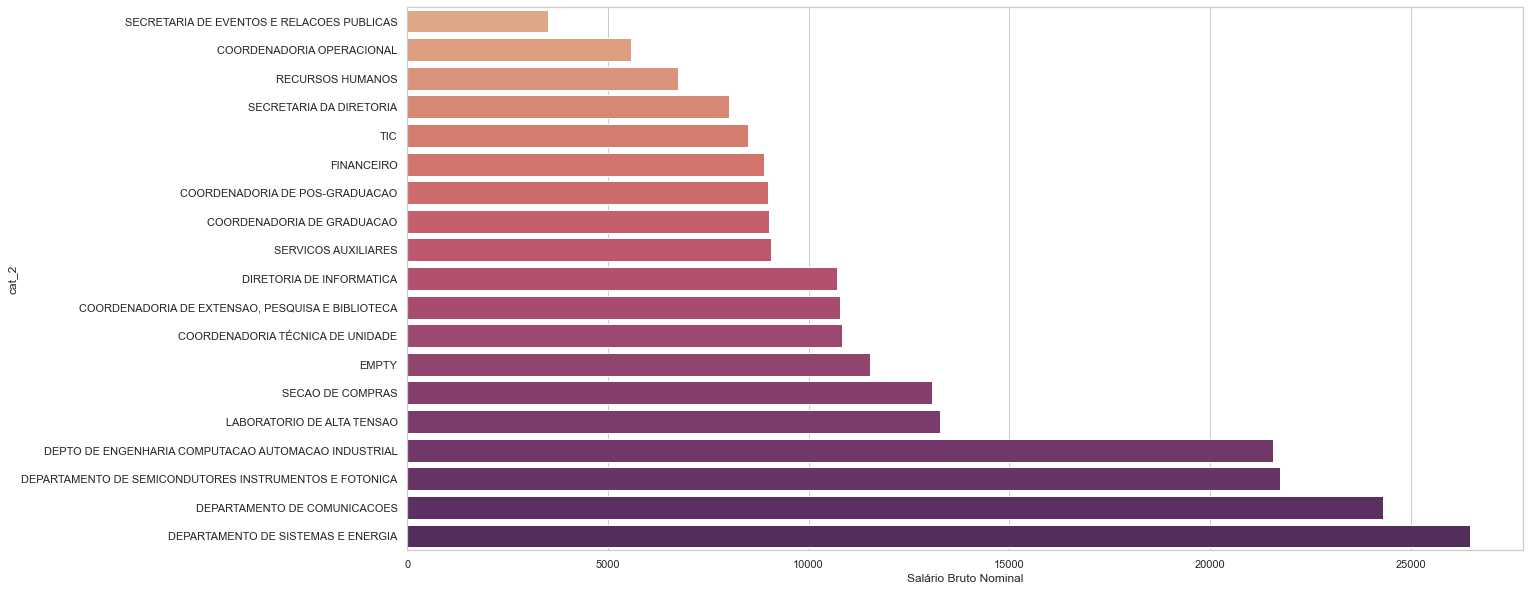

In [267]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,10))

df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('cat_2').median().sort_values('Salário Bruto Nominal').reset_index()
# df_median

sns.barplot(x='Salário Bruto Nominal', y='cat_2', data=df1, order=df1['cat_2'], palette='flare')

plt.savefig("Figures/feec_salaries_subcategory.jpeg")

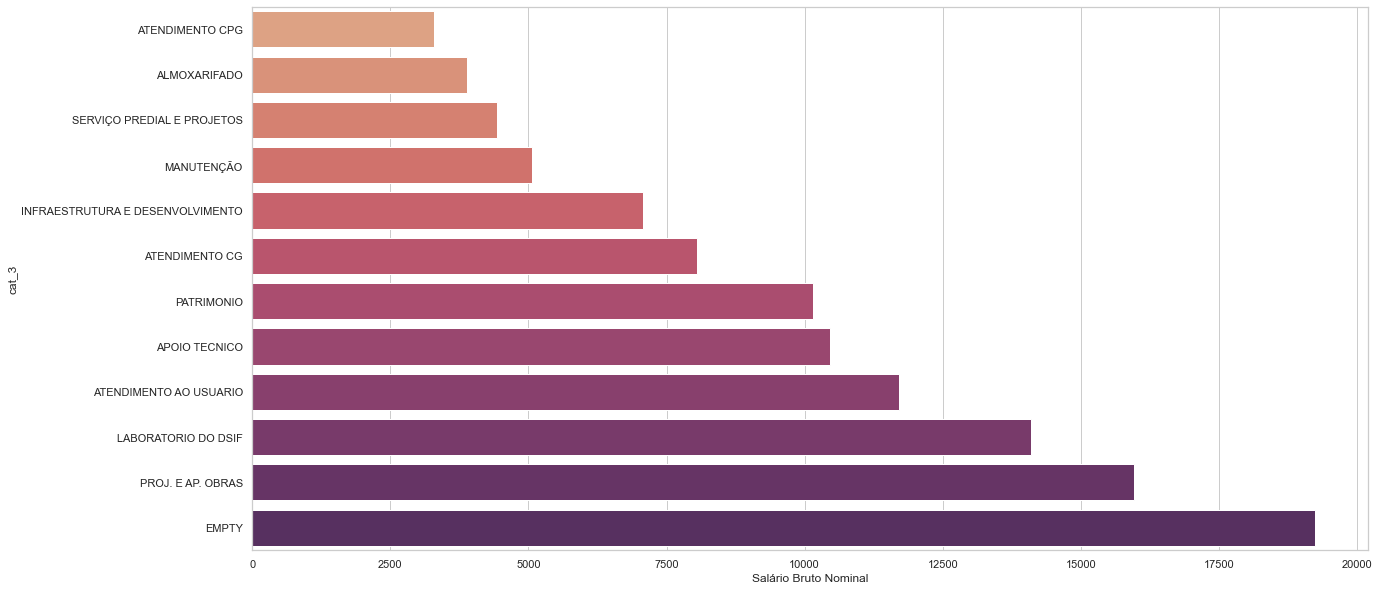

In [268]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,10))

df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('cat_3').median().sort_values('Salário Bruto Nominal').reset_index()
# df_median

sns.barplot(x='Salário Bruto Nominal', y='cat_3', data=df1, order=df1['cat_3'], palette='flare')


plt.savefig("Figures/feec_salaries_subsubcategory.jpeg")

### Ploting by occupation('Cargo1' and 'Cargo2')
Here we plot the median salaries by occupation.  
In the first graph we can see a lot of 'EMPTY' data as the first one, with 'ENGENHEIRO'(Engineer) and 'TECNOLOGO'(technologist) coming in second and third place. But it doesn't give us a lot of information.
Although, in the second one we can see more relevant data.  
The lovewst paid jobs are as we typically expected them to be: civil workers, storekeepers and painters.  
On the high-end we have Professors and engineers, with the highest one being 'Professor titular', the top position of a Professor in UNICAMP university.

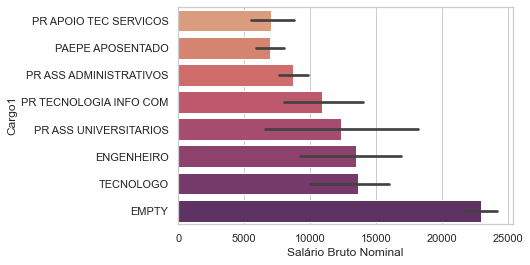

In [269]:
sns.set_theme(style="whitegrid")
# plt.subplots(figsize=(20,10))

df_lock = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('Cargo1').median().sort_values('Salário Bruto Nominal').reset_index()

sns.barplot(x='Salário Bruto Nominal', y='Cargo1', data=df_lock, order=df1['Cargo1'], palette='flare')

plt.savefig("Figures/feec_salaries_occupation1.jpeg")

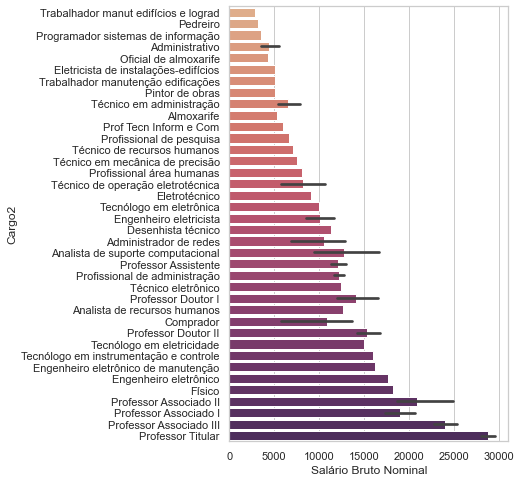

In [270]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(5,8))

df_lock = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('Cargo2').median().sort_values('Salário Bruto Nominal').reset_index()

sns.barplot(x='Salário Bruto Nominal', y='Cargo2', data=df_lock, order=df1['Cargo2'], palette='flare')

plt.savefig("Figures/feec_salaries_occupation2.jpeg")

# Highest salaries
Here we'll see the highest salaries in the whole university.  
Despite this being all public info, i'll try to not cite each individual by name but by their register number ('Matricula').
In São Paulo state (where UNICAMP is), the salary ceiling for a public servant is R\$ 39,239.32. The same to a Supreme court minister, which dictates the limit.  
The salaries over that limit are called "Super salaries" and had to be adjusted to the ceiling back in 08/2019 after a judicial decision in 2015.  
Since its illegal to reduce a government employee (or any employee, in brasilian laws) if their salary is over the ceilins, it is cut to the current ceiling and they don't receive over what the federal law dictates.  

## Super salaries by individual

<ipython-input-271-10075b7f76b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highest['Matrícula'] = df_highest['Matrícula'].astype("string")
<ipython-input-271-10075b7f76b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highest.sort_values('Salário Bruto Nominal', inplace=True)


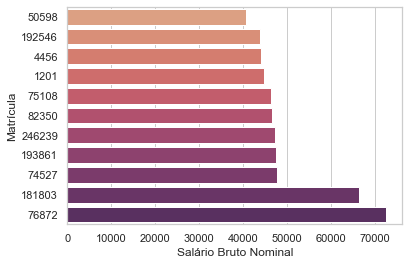

In [271]:
df_highest = data.loc[data['Salário Bruto Nominal'] > 39239.32]
df_highest['Matrícula'] = df_highest['Matrícula'].astype("string")
df_highest.sort_values('Salário Bruto Nominal', inplace=True)
df_highest.reset_index()

sns.barplot(x='Salário Bruto Nominal', y='Matrícula', data=df_highest, palette='flare')

plt.savefig("Figures/super_salaries.jpeg")

## Super salaris by occupation
Here we plot the count by occupation.
'Procurador' (Attorney) is the most common. Which is surprizing since Professors usually have the highest salaries.

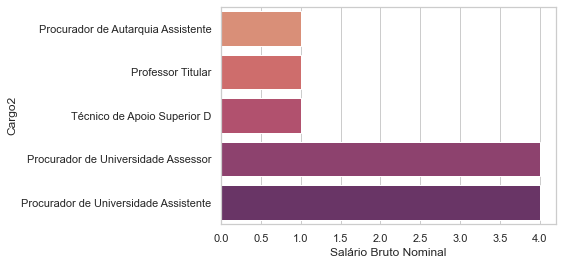

In [274]:
df_highest = data.loc[(data['Salário Bruto Nominal'] > 39239.32)]
df_highest = df_highest.groupby('Cargo2').count().reset_index()
df_highest_order = df_highest.groupby('Cargo2').median().sort_values('Salário Bruto Nominal').reset_index()

sns.barplot(x='Salário Bruto Nominal', y='Cargo2', data=df_highest, order=df_highest_order['Cargo2'], palette='flare')

plt.savefig("Figures/super_salaries_occupation.jpeg")

## 100 Highest salaries by occupation
Here we can see how predominant the 'Professor Titular' is. Occupying almost 80% of the data.

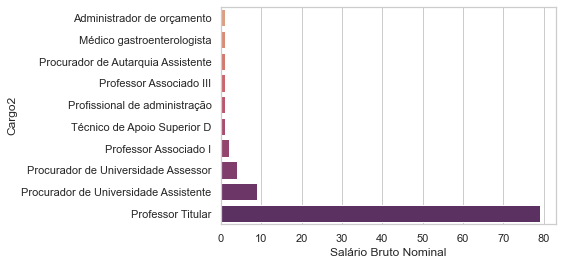

In [273]:
df_highest = data.sort_values('Salário Bruto Nominal').reset_index()
df_highest = df_highest[-100:]
df_highest = df_highest.groupby('Cargo2').count().reset_index()
df_highest_order = df_highest.groupby('Cargo2').median().sort_values('Salário Bruto Nominal').reset_index()

sns.barplot(x='Salário Bruto Nominal', y='Cargo2', data=df_highest, order=df_highest_order['Cargo2'], palette='flare')

plt.savefig("Figures/highest_salaries_occupation.jpeg")

# Conclusions
There are very few super salaries (only 11) on the university.  
The highest salaries are usually of professors.With the acually biggest being from attorneys.  
The biggest expenses with salaries are usually departments less focused on research.  
The biggest mean salaries are usually from colleges.  